In [1]:
import os
import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from CCio import load_ccd_file
from CCio import load_folder

from CCplot import auto_plot_style
from CCplot import plot1d

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

auto_plot_style({"font.size" : 20})

In [3]:
def integrate(df, min=460, max=850, column="dquanta"):
    dfrange = df.loc[(df.em_wl >= min) & (df.em_wl < max)]
    column  = getattr(dfrange, column)
    return column.sum()

In [4]:
folder_0 = "/home/gonzalo/data/CC/sapphire_2020_08_30_15_31_03_796000/"
folder_1 = "/home/gonzalo/data/CC/sapphire_2020_08_30_16_31_03_154000/"
folder_2 = "/home/gonzalo/data/CC/sapphire_2020_08_30_16_54_52_793000/"
folder_3 = "/home/gonzalo/data/CC/sapphire_2020_08_30_17_51_12_551000/" # pushed harder
folder_4 = "/home/gonzalo/data/CC/sapphire_2020_08_30_18_08_52_036000/" # pushed even harder
folder_5 = "/home/gonzalo/data/CC/sapphire_2020_08_30_18_41_59_593000/" # didn't made much of an effort
folder_6 = "/home/gonzalo/data/CC/sapphire_2020_08_30_19_00_52_972000/" # overnight measurement

data_0  = load_folder(folder_0)
data_1  = load_folder(folder_1)
data_2  = load_folder(folder_2)
data_3  = load_folder(folder_3)
data_4  = load_folder(folder_4)
data_5  = load_folder(folder_5)
data_6  = load_folder(folder_6)

datas = data_0, data_1, data_2, data_3, data_4, data_5, data_6

/home/gonzalo/sw/git/CC/CCio.py:287: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat(dfs)


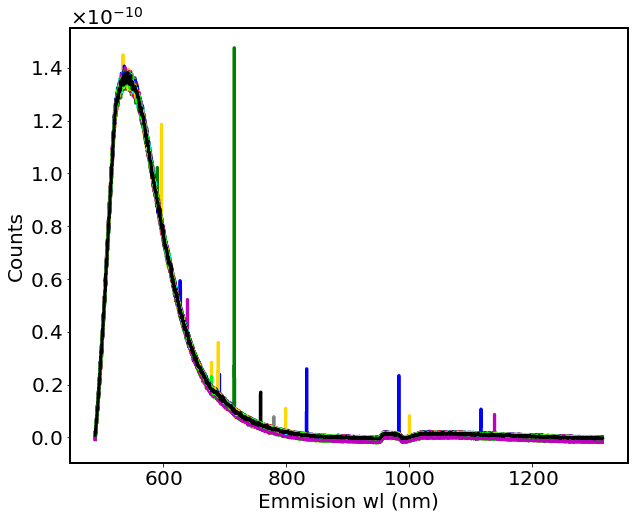

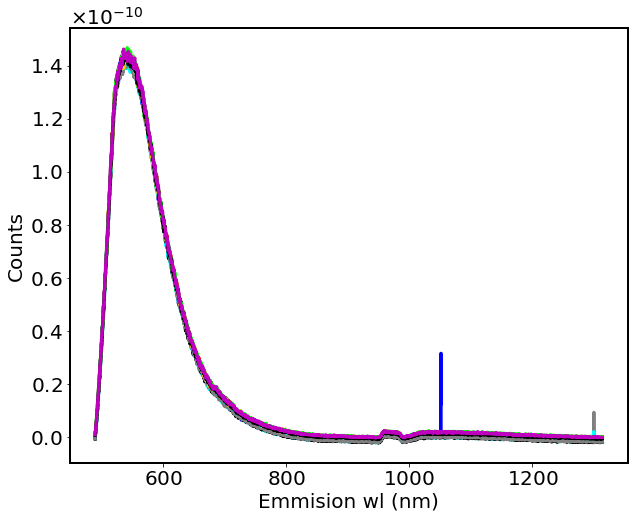

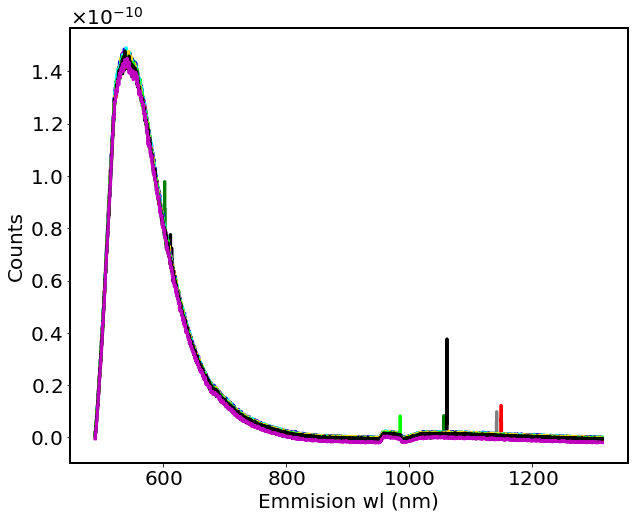

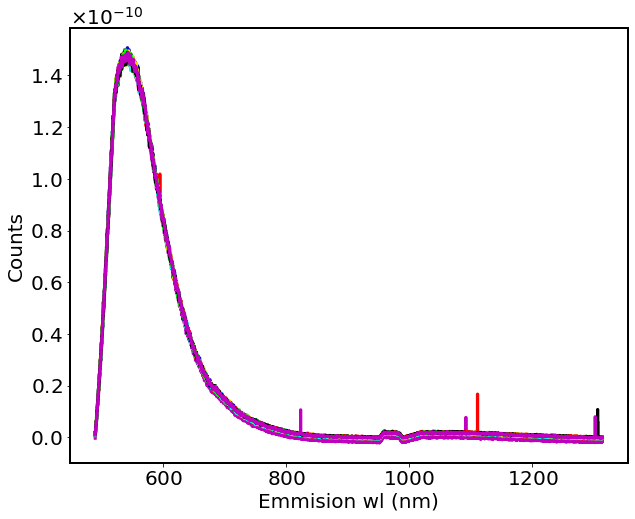

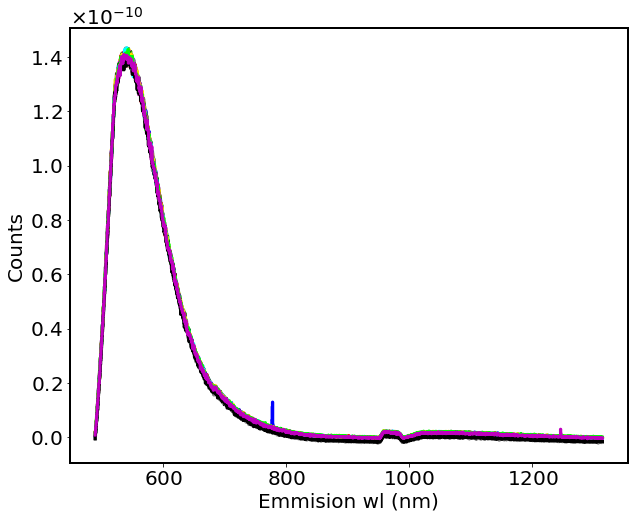

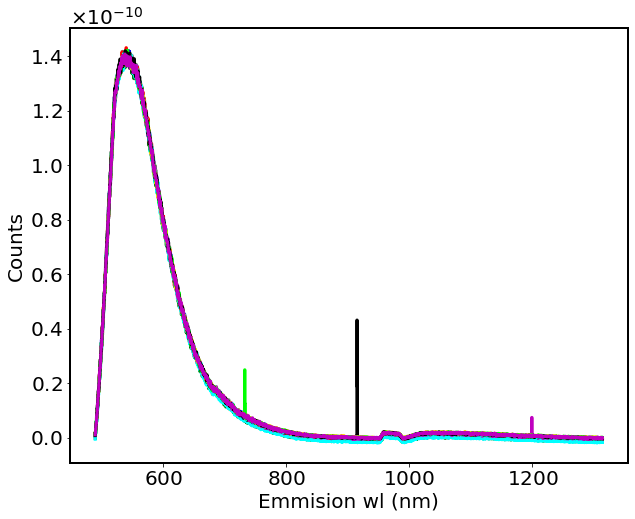

In [5]:
for data in datas[:-1]:
    plt.figure()
    for _, d in data.groupby("state"):
        plot1d(d.em_wl, d.dquanta)

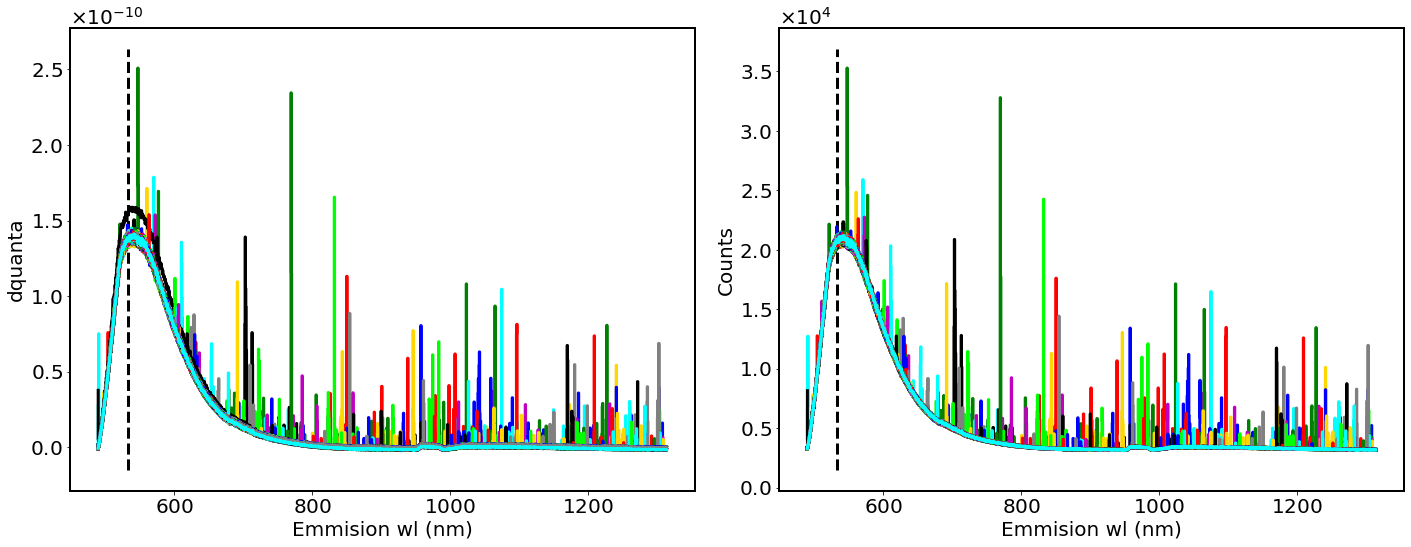

In [6]:
plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
for _, state in data_6.groupby("state"):
    plot1d(state.em_wl, state.dquanta, ylabel="dquanta")

plt.vlines(533, *plt.ylim(), linestyles="--")

plt.subplot(1, 2, 2)
for _, state in data_6.groupby("state"):
    plot1d(state.em_wl, state.counts)

plt.vlines(533, *plt.ylim(), linestyles="--")

plt.tight_layout()

696082
2347280
2347281
2347282
2347283
2347284
2347285
2347286


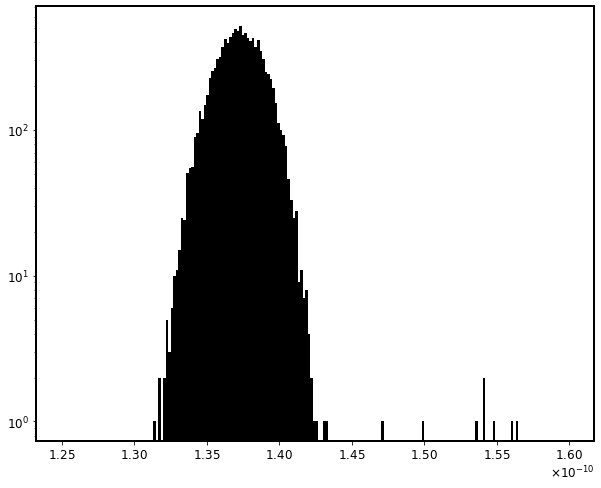

In [6]:
peak = data_6.loc[lambda x: (x.em_wl > 531) & (x.em_wl < 535)]
plt.hist(peak.dquanta, np.linspace(1.25e-10, 1.6e-10, 201))
plt.yscale("log")

for s, row in peak.iterrows():
    if row.dquanta > 1.45e-10:
        print(s)

In [41]:
integrals = data_6.groupby("state").apply(integrate, column="counts")

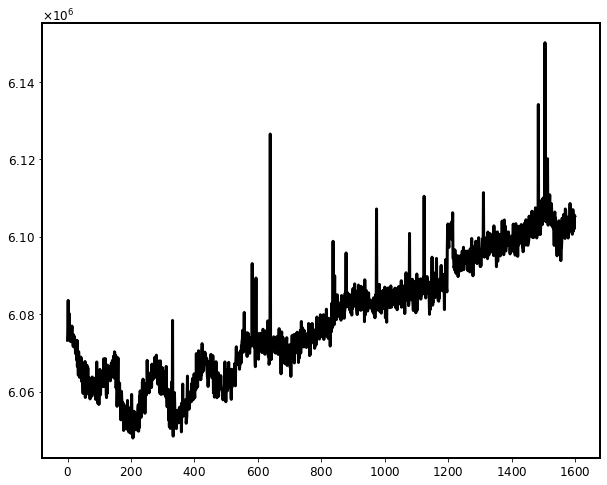

In [42]:
plt.plot(integrals)

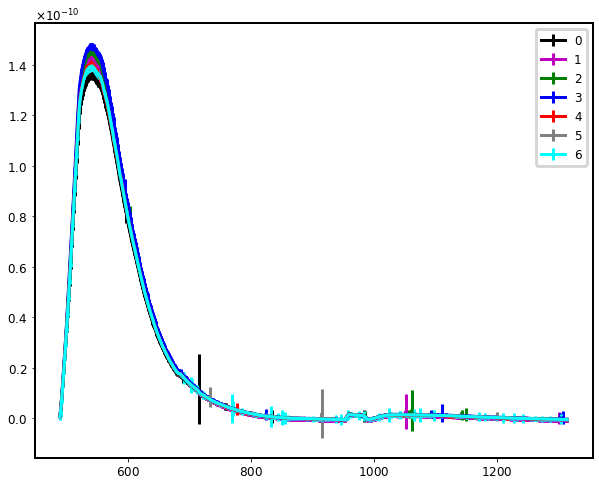

In [5]:
for i, data in enumerate(datas):
    df = data.groupby("em_wl", as_index=False).dquanta.agg(dict(mu="mean", sig="std"))
    plt.errorbar(df.em_wl, df.mu, df.sig, label=str(i))

plt.legend()

In [7]:
15*60/11*20

1636.3636363636363